This notebook was used to visualize and summarize the output of the seasonality script. The data is first loaded and subsequently summarized and visualized using matplotlib.

In [2]:
#import libraries
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import xarray as xr 
import pandas as pd 
import seaborn as sns

In [3]:
#load data files
file1 = "/lustre/backup/WUR/ESG/gohin001/Data/seasonality/seasonality_historical.nc"
file2= "/lustre/backup/WUR/ESG/gohin001/Data/seasonality/seasonality_ssp126.nc"
file3 = "/lustre/backup/WUR/ESG/gohin001/Data/seasonality/seasonality_ssp370.nc"
file4 = "/lustre/backup/WUR/ESG/gohin001/Data/seasonality/seasonality_ssp585.nc"
historical = xr.open_dataset(file1)
ssp126 = xr.open_dataset(file2)
ssp370 = xr.open_dataset(file3)
ssp585 = xr.open_dataset(file4)
print(historical)

<xarray.Dataset> Size: 75MB
Dimensions:                              (time: 18262, lon: 720, lat: 360,
                                          month: 12)
Coordinates:
  * time                                 (time) datetime64[ns] 146kB 1965-01-...
  * lon                                  (lon) float64 6kB -179.8 ... 179.8
  * lat                                  (lat) float64 3kB 89.75 ... -89.75
    quantile                             float64 8B ...
  * month                                (month) int64 96B 1 2 3 4 ... 10 11 12
Data variables: (12/36)
    date_drought_DtoF                    (lat, lon) float64 2MB ...
    strength_seas_drought_DtoF           (lat, lon) float64 2MB ...
    date_flood_DtoF                      (lat, lon) float64 2MB ...
    strength_seas_flood_DtoF             (lat, lon) float64 2MB ...
    date_drought_DtoF_moderate           (lat, lon) float64 2MB ...
    strength_seas_drought_DtoF_moderate  (lat, lon) float64 2MB ...
    ...                       

In [4]:
#computation of mean global strength of seasonality across CFD event and transition types for historical and future scenarios
scenarios = {"historical": historical, "ssp126": ssp126, "ssp370": ssp370}
for scenario_name, scenario in scenarios.items():
    print(f"strength seasonality drought in DtoF all for {scenario_name}: {scenario['strength_seas_drought_DtoF'].mean().item()}")
    print(f"strength seasonality flood in DtoF all for {scenario_name}: {scenario['strength_seas_flood_DtoF'].mean().item()}")
    print(f"strength seasonality drought in DtoF slow for {scenario_name}: {scenario['strength_seas_drought_DtoF_moderate'].mean().item()}")
    print(f"strength seasonality flood in DtoF slow for {scenario_name}: {scenario['strength_seas_flood_DtoF_moderate'].mean().item()}")
    print(f"strength seasonality drought in DtoF rapid for {scenario_name}: {scenario['strength_seas_drought_DtoF_rapid'].mean().item()}")
    print(f"strength seasonality flood in DtoF rapid for {scenario_name}: {scenario['strength_seas_flood_DtoF_rapid'].mean().item()}")
    print(f"strength seasonality drought in DtoF abrupt for {scenario_name}: {scenario['strength_seas_drought_DtoF_abrupt'].mean().item()}")
    print(f"strength seasonality flood in DtoF abrupt for {scenario_name}: {scenario['strength_seas_flood_DtoF_abrupt'].mean().item()}")
    
    print(f"strength seasonality drought in FtoD for {scenario_name}: {scenario['strength_seas_drought_FtoD'].mean().item()}")
    print(f"strength seasonality flood in FtoD for {scenario_name}: {scenario['strength_seas_flood_FtoD'].mean().item()}")
    print(f"strength seasonality drought in FtoD slow for {scenario_name}: {scenario['strength_seas_drought_FtoD_moderate'].mean().item()}")
    print(f"strength seasonality flood in FtoD slow for {scenario_name}: {scenario['strength_seas_flood_FtoD_moderate'].mean().item()}")
    print(f"strength seasonality drought in FtoD rapid for {scenario_name}: {scenario['strength_seas_drought_FtoD_rapid'].mean().item()}")
    print(f"strength seasonality flood in FtoD rapid for {scenario_name}: {scenario['strength_seas_flood_FtoD_rapid'].mean().item()}")
    print(f"strength seasonality drought in FtoD abrupt for {scenario_name}: {scenario['strength_seas_drought_FtoD_abrupt'].mean().item()}")
    print(f"strength seasonality flood in FtoD abrupt for {scenario_name}: {scenario['strength_seas_flood_FtoD_abrupt'].mean().item()}")
    
    print(f"strength seasonality drought in D&F for {scenario_name}: {scenario['strength_seas_drought_D&F'].mean().item()}")
    print(f"strength seasonality flood in D&F for {scenario_name}: {scenario['strength_seas_flood_D&F'].mean().item()}")

    


strength seasonality drought in DtoF all for historical: 0.6858692154907318
strength seasonality flood in DtoF all for historical: 0.9097970542346403
strength seasonality drought in DtoF slow for historical: 0.8363048307959206
strength seasonality flood in DtoF slow for historical: 0.9209431600158227
strength seasonality drought in DtoF rapid for historical: 0.8105071277382007
strength seasonality flood in DtoF rapid for historical: 0.9368497825316214
strength seasonality drought in DtoF abrupt for historical: 0.8494490104308786
strength seasonality flood in DtoF abrupt for historical: 0.9686278810443628
strength seasonality drought in FtoD for historical: 0.7429275923207088
strength seasonality flood in FtoD for historical: 0.9119824410293801
strength seasonality drought in FtoD slow for historical: 0.8678799299641835
strength seasonality flood in FtoD slow for historical: 0.9244487245653743
strength seasonality drought in FtoD rapid for historical: 0.9109134583222082
strength seasona

/tmp/ipykernel_3600959/1703555848.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])


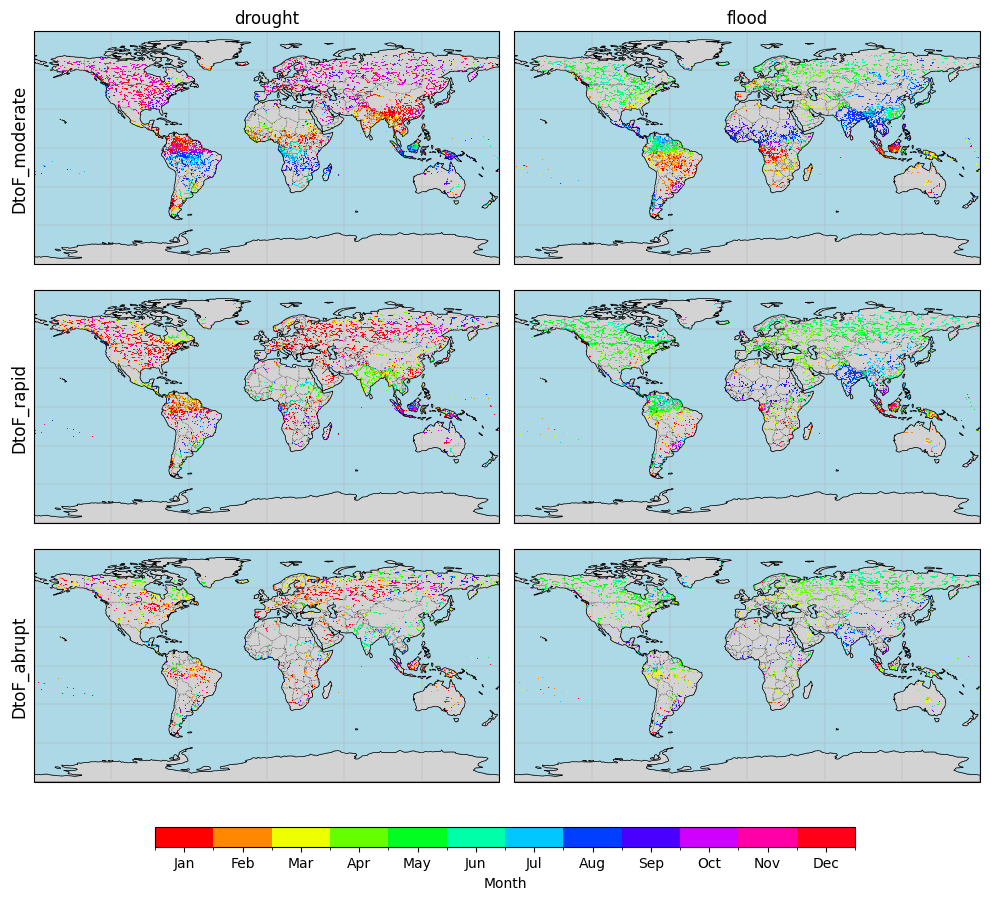

In [28]:
#map of transition types for DtoF transition types in the historical period

drought_flood = ["drought", "flood"]
CFD_type = ["DtoF_moderate", "DtoF_rapid", "DtoF_abrupt"]

# Define a continuous colormap
cmap = plt.cm.hsv  
bounds = np.arange(13)  # 0 to 12 for 12 months
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Create figure and subplots (rows: CFD_type, cols: drought/flood)
fig, axes = plt.subplots(nrows=len(CFD_type), ncols=len(drought_flood),
                         figsize=(10, 20), subplot_kw={"projection": ccrs.PlateCarree()})

# Create a colorbar axis (placed at bottom)
cbar_ax = fig.add_axes([0.16, 0.33, 0.7, 0.01])  # Horizontal bar at bottom

# Loop through scenarios and event types
for i, CFD in enumerate(CFD_type):
    for j, event in enumerate(drought_flood):
        ax = axes[i, j]  # Correct indexing
        data = historical[f"date_{event}_{CFD}"] 
        
        # Add map features
        ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
        ax.add_feature(cfeature.BORDERS, linestyle=":", linewidth=0.4)
        ax.add_feature(cfeature.LAND, facecolor="lightgray", edgecolor="black", linewidth=0.3)
        ax.add_feature(cfeature.OCEAN, facecolor="lightblue")

        # Plot data
        img = data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm, add_colorbar=False, add_labels=False)

        ax.set_title("")  # Remove auto-title
        if i == 0:
            ax.set_title(event, fontsize=12)
        if j == 0:
            ax.set_ylabel(CFD, fontsize=12)

        ax.set_xticks([])
        ax.set_yticks([])
        ax.gridlines(linewidth=0.3, draw_labels=False)

# Adjust layout
plt.subplots_adjust(hspace=-0.85)

# Add colorbar
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
cbar = fig.colorbar(img, cax=cbar_ax, ticks=np.arange(0.5, 12.5, 1), orientation='horizontal', label="Month")
cbar.ax.set_xticklabels(month_labels)

plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.savefig("transition_types_occurrence", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()


/tmp/ipykernel_3600959/1387616837.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])


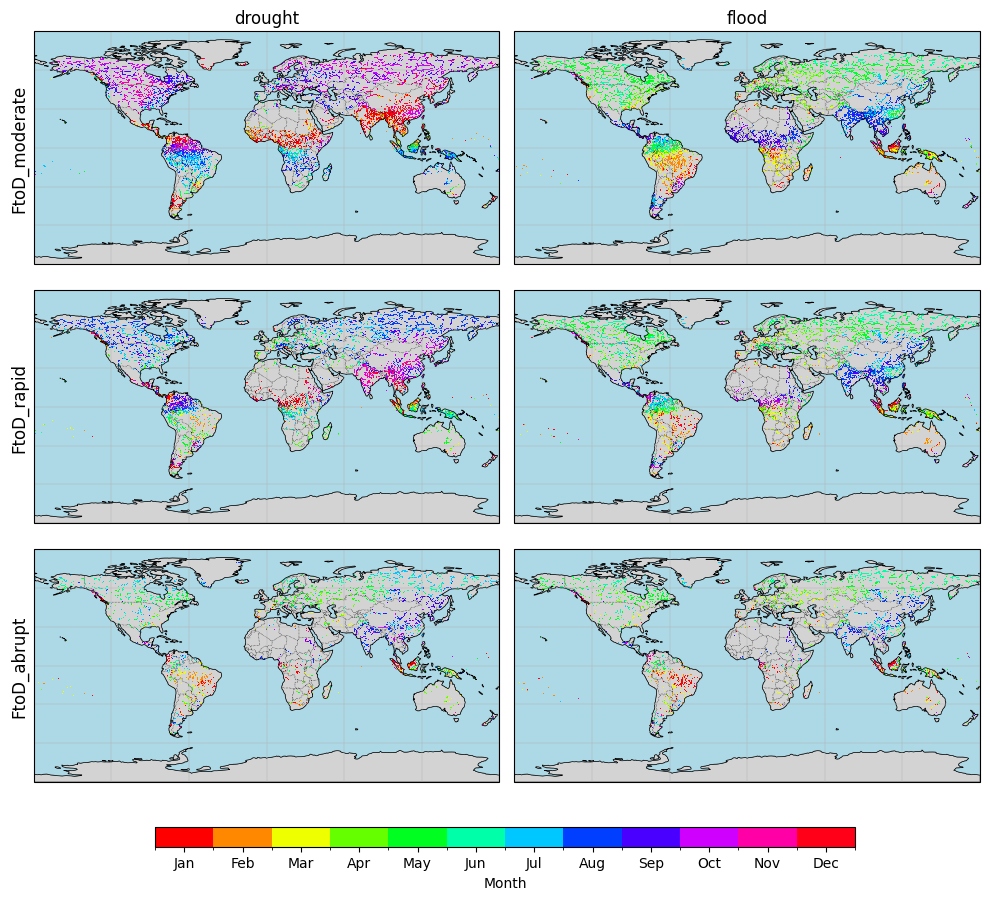

In [30]:
#map of transition types for FtoD transition types in the historical period

drought_flood = ["drought", "flood"]
CFD_type = ["FtoD_moderate", "FtoD_rapid", "FtoD_abrupt"]

# Define a continuous colormap
cmap = plt.cm.hsv  
bounds = np.arange(13)  # 0 to 12 for 12 months
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Create figure and subplots (rows: CFD_type, cols: drought/flood)
fig, axes = plt.subplots(nrows=len(CFD_type), ncols=len(drought_flood),
                         figsize=(10, 20), subplot_kw={"projection": ccrs.PlateCarree()})

# Create a colorbar axis (placed at bottom)
cbar_ax = fig.add_axes([0.16, 0.33, 0.7, 0.01])  # Horizontal bar at bottom

# Loop through scenarios and event types
for i, CFD in enumerate(CFD_type):
    for j, event in enumerate(drought_flood):
        ax = axes[i, j]  # Correct indexing
        data = historical[f"date_{event}_{CFD}"] 
        
        # Add map features
        ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
        ax.add_feature(cfeature.BORDERS, linestyle=":", linewidth=0.4)
        ax.add_feature(cfeature.LAND, facecolor="lightgray", edgecolor="black", linewidth=0.3)
        ax.add_feature(cfeature.OCEAN, facecolor="lightblue")

        # Plot data
        img = data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm, add_colorbar=False, add_labels=False)

        ax.set_title("")  # Remove auto-title
        if i == 0:
            ax.set_title(event, fontsize=12)
        if j == 0:
            ax.set_ylabel(CFD, fontsize=12)

        ax.set_xticks([])
        ax.set_yticks([])
        ax.gridlines(linewidth=0.3, draw_labels=False)

# Adjust layout
plt.subplots_adjust(hspace=-0.85)

# Add colorbar
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
cbar = fig.colorbar(img, cax=cbar_ax, ticks=np.arange(0.5, 12.5, 1), orientation='horizontal', label="Month")
cbar.ax.set_xticklabels(month_labels)

plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.savefig("transition_type_FtoD_occurrence", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()


/tmp/ipykernel_2848532/1066059163.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=1.5)
/tmp/ipykernel_2848532/1066059163.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


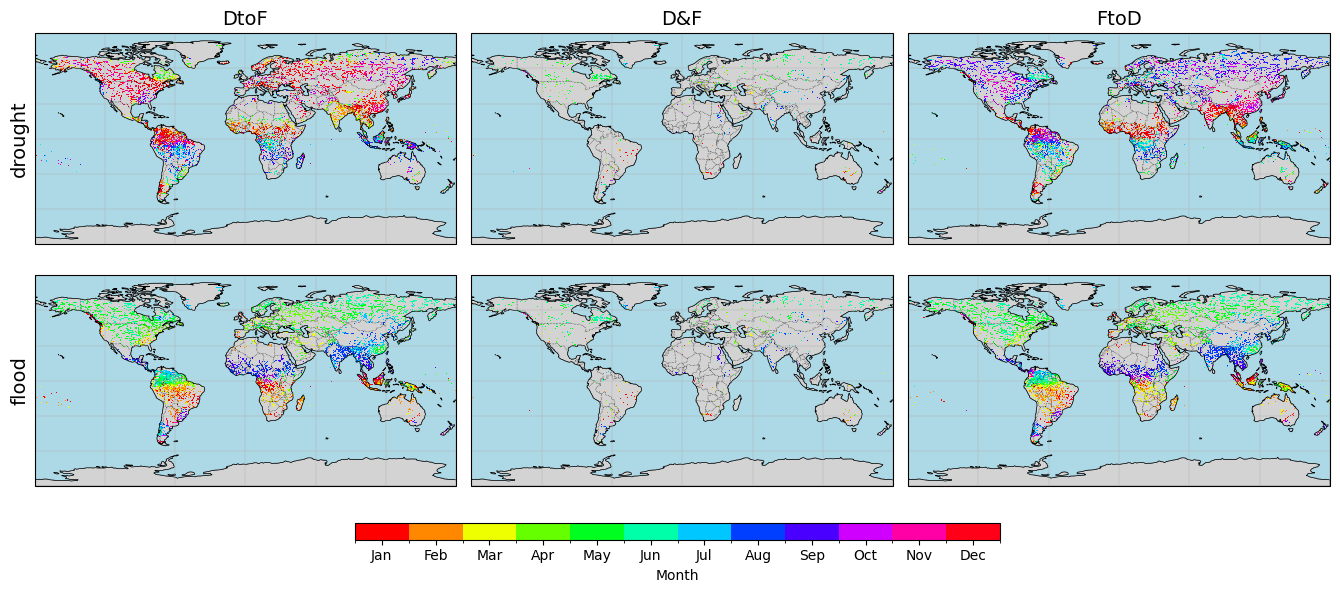

In [18]:
#create map of drought and flood mean date of occurrence in the historical period across CFD event type.
drought_flood = ["drought", "flood"]
CFD_type = ["DtoF", "D&F", "FtoD"]

# Define a continuous colormap
cmap = plt.cm.hsv  
bounds = np.linspace(0, 12, 13).round(0)
norm = mcolors.BoundaryNorm(bounds, cmap.N)  # Normalize colors to data range

# Create figure and subplots (rows: scenarios, cols: event types)
fig, axes = plt.subplots(nrows=len(drought_flood), ncols=len(CFD_type),
                         figsize=(15, 10), subplot_kw={"projection": ccrs.PlateCarree()})

# Create a colorbar axis
cbar_ax = fig.add_axes([0.24, 0.22, 0.43, 0.017])

# Your plotting loop
for i, event in enumerate(drought_flood):
    for j, CFD in enumerate(CFD_type):
        ax = axes[i, j]
        data = historical[f"date_{event}_{CFD}"]

        ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
        ax.add_feature(cfeature.BORDERS, linestyle=":", linewidth=0.4)
        ax.add_feature(cfeature.LAND, facecolor="lightgray", edgecolor="black", linewidth=0.3)
        ax.add_feature(cfeature.OCEAN, facecolor="lightblue")

        img = data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm, add_colorbar=False, add_labels=False)

        ax.set_title(CFD if i == 0 else "", fontsize=14)
        if j == 0:
            ax.set_ylabel(event, fontsize=14)

        ax.set_xticks([])
        ax.set_yticks([])
        ax.gridlines(linewidth=0.3, draw_labels=False)

# Set colorbar with month labels
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
cbar = fig.colorbar(img, cax=cbar_ax, ticks=np.arange(0.5, 12.5, 1), location = 'bottom', label="Month")
plt.subplots_adjust(hspace=-0.9)
# Add a single colorbar

plt.tight_layout(pad=1.5)
plt.tight_layout(rect=[0, 0, 0.9, 1]) 
cbar.ax.set_xticklabels(month_labels)


# Save and show
plt.savefig("mean_date_occurence_historical_fixed.png", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()




/tmp/ipykernel_2083892/1089900345.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1], pad=1.5)


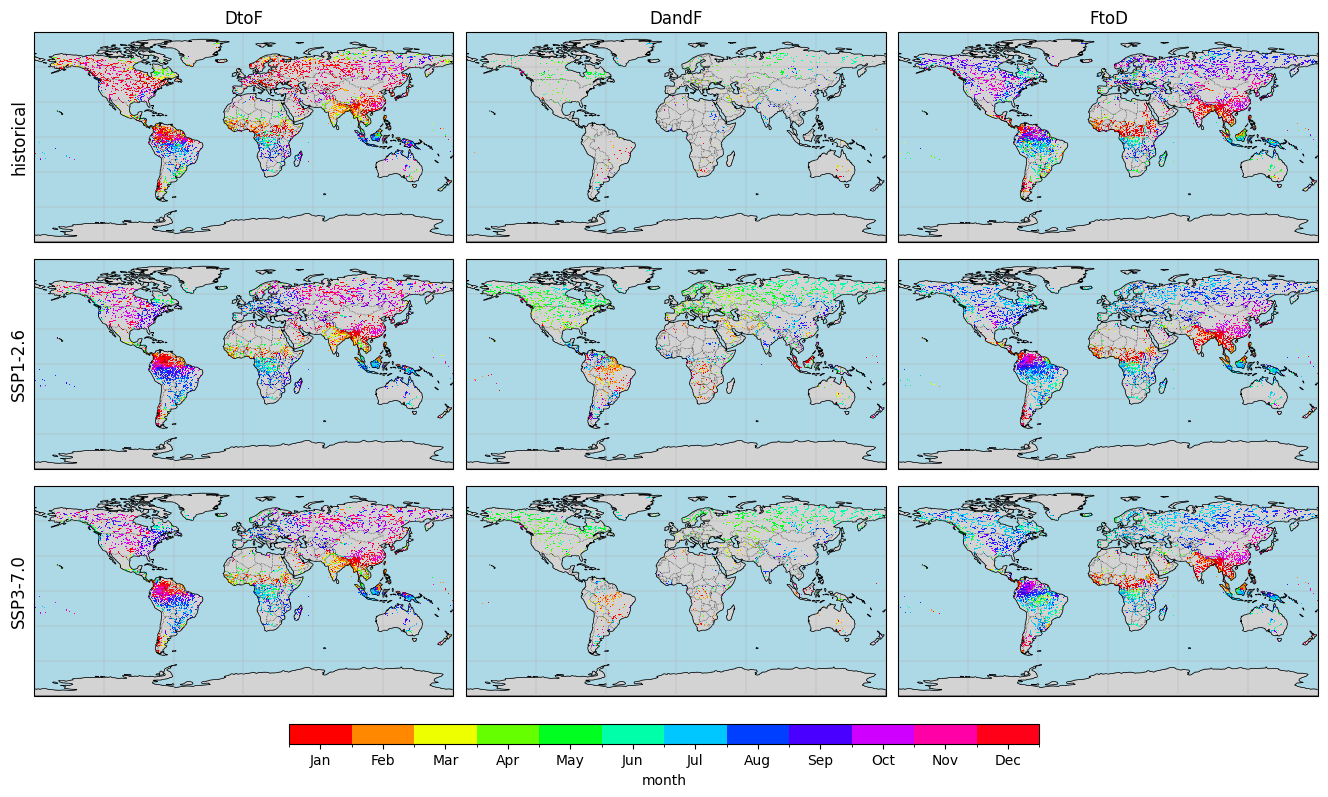

In [14]:
#create map of mean date of occurrence for droughts in the historical period and future scenarios across CFD event types.
# Define scenarios
scenarios = {
    "historical": historical,
    "SSP1-2.6": ssp126, 
    "SSP3-7.0": ssp370
}

# Define event types
event_types = ["DtoF", "DandF", "FtoD"]

# Define a continuous colormap
cmap = plt.cm.hsv  # Yellow to Red/Orange colormap
bounds = np.linspace(0, 12, 13).round(0)
norm = mcolors.BoundaryNorm(bounds, cmap.N)  # Normalize colors to data range

# Create figure and subplots (rows: scenarios, cols: event types)
fig, axes = plt.subplots(nrows=len(scenarios), ncols=len(event_types),
                         figsize=(15, 10), subplot_kw={"projection": ccrs.PlateCarree()})

# Create a colorbar axis
cbar_ax = fig.add_axes([0.2, 0.12, 0.5, 0.02])

# Loop through scenarios and event types
for i, (scenario_name, scenario) in enumerate(scenarios.items()):
    for j, event in enumerate(event_types):
        ax = axes[i, j]
        
        # Extract the correct dataset
        if event == "DtoF":
            data = (scenario['date_drought_DtoF'])
        elif event == "DandF":
            data =  (scenario['date_drought_D&F'])
        elif event == "FtoD":
            data = (scenario['date_drought_FtoD'])
        
        # Add map features with  outlines
        ax.add_feature(cfeature.COASTLINE, linewidth=0.5) 
        ax.add_feature(cfeature.BORDERS, linestyle=":", linewidth=0.4) 
        ax.add_feature(cfeature.LAND, facecolor = "lightgray", edgecolor="black", linewidth=0.3) 
        ax.add_feature(cfeature.OCEAN, facecolor="lightblue")  

        # Plot data
        img = data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm, add_colorbar=False, add_labels=False)

        # Remove auto-generated title
        ax.set_title("")  

        # Title for columns
        if i == 0:
            ax.set_title(event, fontsize=12)

        # Label rows
        if j == 0:
            ax.set_ylabel(scenario_name, fontsize=12)

        # Remove gridlines and ticks
        ax.set_xticks([])  # Remove x-axis ticks
        ax.set_yticks([])  # Remove y-axis ticks
        #ax.set_xlabel("")
        #ax.set_ylabel("")
        ax.gridlines(linewidth = 0.3, draw_labels=False)  # Remove gridline labels

plt.subplots_adjust(hspace=-0.8)
# Add a single colorbar
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig.colorbar(img, cax=cbar_ax, ticks=np.arange(0.5, 12.5, 1), location = "bottom", label="month")


plt.tight_layout(rect=[0, 0, 0.9, 1], pad=1.5)
plt.subplots_adjust(wspace=0.03, hspace=-0.55)
cbar_ax.set_xticklabels(month_labels)
plt.savefig("drought_seasonality.png", dpi=300, bbox_inches="tight")
plt.show()


/tmp/ipykernel_2083892/2637025605.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1], pad=1.5)


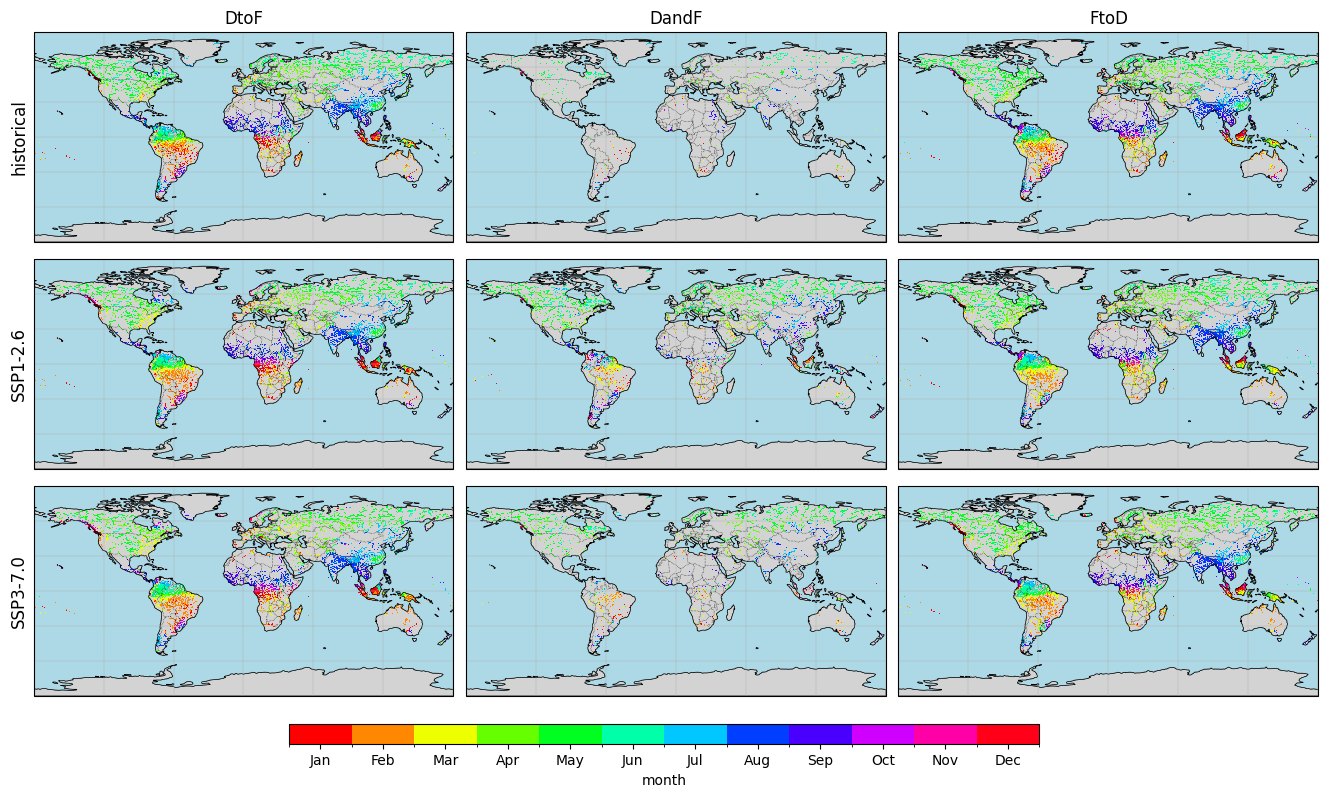

In [19]:
#create map of mean date of occurrence for floods in the historical period and future scenarios across CFD event types.
# Define scenarios
scenarios = {
    "historical": historical,
    "SSP1-2.6": ssp126, 
    "SSP3-7.0": ssp370
}

# Define event types
event_types = ["DtoF", "DandF", "FtoD"]

# Define a continuous colormap
cmap = plt.cm.hsv  # Yellow to Red/Orange colormap
bounds = np.linspace(0, 12, 13).round(0)
norm = mcolors.BoundaryNorm(bounds, cmap.N)  # Normalize colors to data range

# Create figure and subplots (rows: scenarios, cols: event types)
fig, axes = plt.subplots(nrows=len(scenarios), ncols=len(event_types),
                         figsize=(15, 10), subplot_kw={"projection": ccrs.PlateCarree()})

# Create a colorbar axis
cbar_ax = fig.add_axes([0.2, 0.12, 0.5, 0.02])

# Loop through scenarios and event types
for i, (scenario_name, scenario) in enumerate(scenarios.items()):
    for j, event in enumerate(event_types):
        ax = axes[i, j]
        
        # Extract the correct dataset
        if event == "DtoF":
            data = (scenario['date_flood_DtoF'])
        elif event == "DandF":
            data =  (scenario['date_flood_D&F'])
        elif event == "FtoD":
            data = (scenario['date_flood_FtoD'])
        
        # Add map features with  outlines
        ax.add_feature(cfeature.COASTLINE, linewidth=0.5) 
        ax.add_feature(cfeature.BORDERS, linestyle=":", linewidth=0.4)  
        ax.add_feature(cfeature.LAND, facecolor = "lightgray", edgecolor="black", linewidth=0.3) 
        ax.add_feature(cfeature.OCEAN, facecolor="lightblue")  

        # Plot data
        img = data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm, add_colorbar=False, add_labels=False)

        # Remove auto-generated title
        ax.set_title("")  

        # Title for columns
        if i == 0:
            ax.set_title(event, fontsize=12)

        # Label rows
        if j == 0:
            ax.set_ylabel(scenario_name, fontsize=12)

        # Remove gridlines and ticks
        ax.set_xticks([])  # Remove x-axis ticks
        ax.set_yticks([])  # Remove y-axis ticks
        #ax.set_xlabel("")
        #ax.set_ylabel("")
        ax.gridlines(linewidth = 0.3, draw_labels=False)  # Remove gridline labels

plt.subplots_adjust(hspace=-0.8)
# Add a single colorbar
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig.colorbar(img, cax=cbar_ax, ticks=np.arange(0.5, 12.5, 1), location = "bottom", label="month")


plt.tight_layout(rect=[0, 0, 0.9, 1], pad=1.5)
plt.subplots_adjust(wspace=0.03, hspace=-0.55)
cbar_ax.set_xticklabels(month_labels)
plt.savefig("flood_seasonality.png", dpi=300, bbox_inches="tight")
plt.show()


/tmp/ipykernel_2848532/1451176955.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=1.5)
/tmp/ipykernel_2848532/1451176955.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


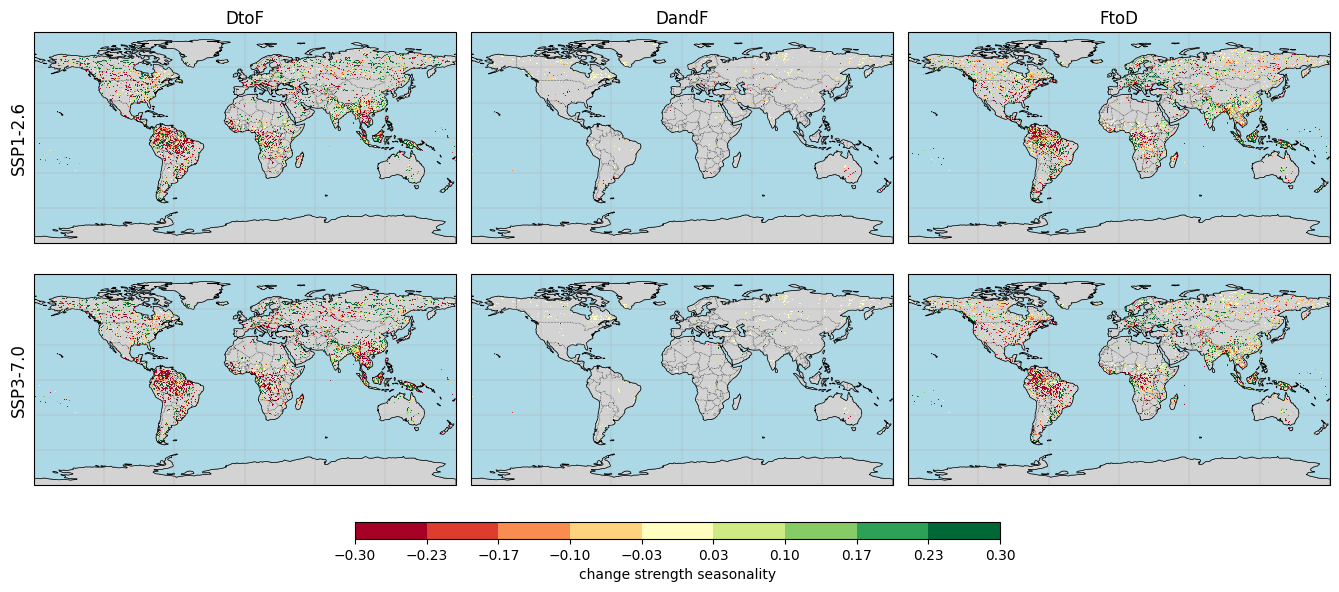

In [24]:
#create map of strength of seasonality of droughts change in future scenarios across CFD event types
# Define scenarios
scenarios = {
    "SSP1-2.6": ssp126, 
    "SSP3-7.0": ssp370
}

# Define event types
event_types = ["DtoF", "DandF", "FtoD"]

# Define a continuous colormap
cmap = plt.cm.RdYlGn  # Yellow to Red/Orange colormap

# Define boundaries for the colorbar
bounds = np.linspace(-0.3,0.3,10).round(2)
norm = mcolors.BoundaryNorm(bounds, cmap.N)  # Normalize colors to data range

# Create figure and subplots (rows: scenarios, cols: event types)
fig, axes = plt.subplots(nrows=len(scenarios), ncols=len(event_types),
                         figsize=(15, 10), subplot_kw={"projection": ccrs.PlateCarree()})

# Create a colorbar axis
cbar_ax = fig.add_axes([0.24, 0.22, 0.43, 0.017])  # Adjust the position of the colorbar

# Loop through scenarios and event types
for i, (scenario_name, scenario) in enumerate(scenarios.items()):
    for j, event in enumerate(event_types):
        ax = axes[i, j]
        
        # Extract the dataset
        if event == "DtoF":
            data = scenario['strength_seas_drought_DtoF'] - historical['strength_seas_drought_DtoF']
        elif event == "DandF":
            data =  scenario['strength_seas_drought_D&F'] - historical['strength_seas_drought_D&F']
        elif event == "FtoD":
            data = scenario['strength_seas_drought_FtoD'] - historical['strength_seas_drought_FtoD']
        
        # Add map features with outlines
        ax.add_feature(cfeature.COASTLINE, linewidth=0.5) 
        ax.add_feature(cfeature.BORDERS, linestyle=":", linewidth=0.4) 
        ax.add_feature(cfeature.LAND, facecolor = "lightgray", edgecolor="black", linewidth=0.3) 
        ax.add_feature(cfeature.OCEAN, facecolor="lightblue")  

        # Plot data
        img = data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm, add_colorbar=False, add_labels = False)

        # Remove auto-generated title
        ax.set_title("")  

        # Title for columns
        if i == 0:
            ax.set_title(event, fontsize=12)

        # Label rows
        if j == 0:
            ax.set_ylabel(scenario_name, fontsize=12)

        # Remove gridlines and ticks
        ax.set_xticks([])  # Remove x-axis ticks
        ax.set_yticks([])  # Remove y-axis ticks
        #ax.set_xlabel("")
        #ax.set_ylabel("")
        ax.gridlines(linewidth = 0.3, draw_labels=False)  # Remove gridline labels

plt.subplots_adjust(hspace=-0.9)
# Add a single colorbar
fig.colorbar(img, cax=cbar_ax, location = "bottom", label="change strength seasonality")

plt.tight_layout(pad=1.5)
plt.tight_layout(rect=[0, 0, 0.9, 1]) 
plt.savefig(
    "change_strength_seasonality_droughts.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    pad_inches=0.05  # Minimal external padding
)
plt.show()


/tmp/ipykernel_2848532/1297751415.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=1.5)
/tmp/ipykernel_2848532/1297751415.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


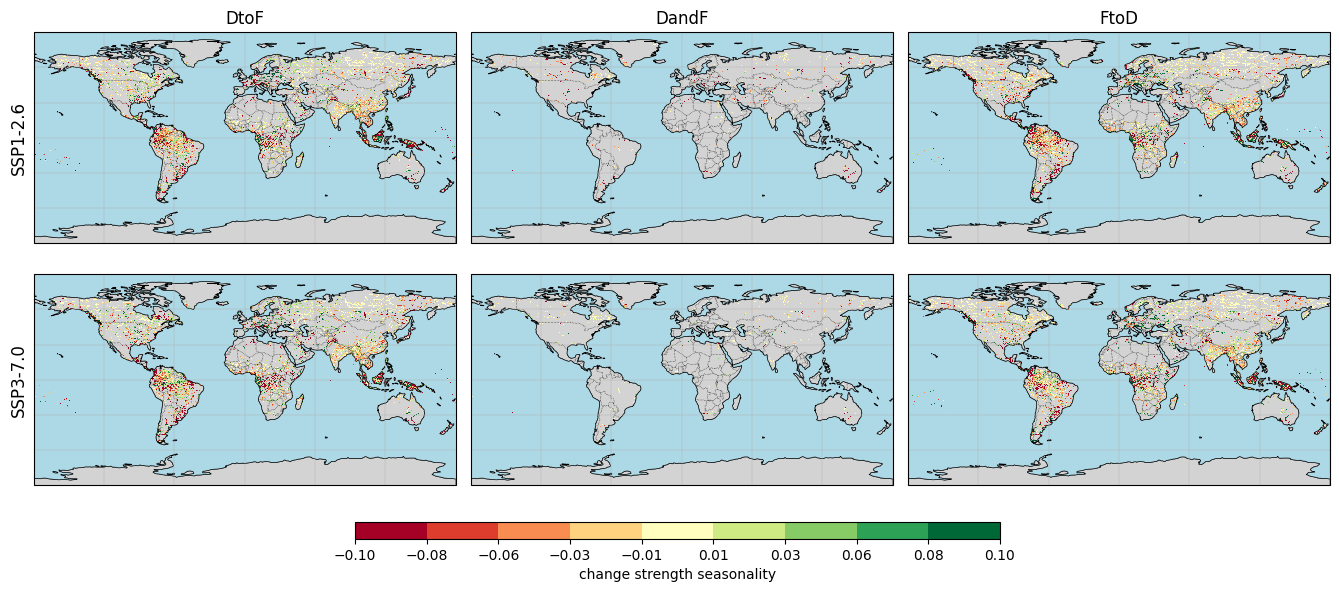

In [26]:
#create map of strength of seasonality of floods change in future scenarios across CFD event types
# Define scenarios
scenarios = {
    "SSP1-2.6": ssp126, 
    "SSP3-7.0": ssp370
}

# Define event types
event_types = ["DtoF", "DandF", "FtoD"]

# Define a continuous colormap
cmap = plt.cm.RdYlGn  # Yellow to Red/Orange colormap

# Define boundaries for the colorbar
bounds = np.linspace(-0.1,0.1,10).round(2)
norm = mcolors.BoundaryNorm(bounds, cmap.N)  # Normalize colors to data range

# Create figure and subplots (rows: scenarios, cols: event types)
fig, axes = plt.subplots(nrows=len(scenarios), ncols=len(event_types),
                         figsize=(15, 10), subplot_kw={"projection": ccrs.PlateCarree()})

# Create a colorbar axis
cbar_ax = fig.add_axes([0.24, 0.22, 0.43, 0.017])  # Adjust the position of the colorbar

# Loop through scenarios and event types
for i, (scenario_name, scenario) in enumerate(scenarios.items()):
    for j, event in enumerate(event_types):
        ax = axes[i, j]
        
        # Extract the dataset
        if event == "DtoF":
            data = scenario['strength_seas_flood_DtoF'] - historical['strength_seas_flood_DtoF']
        elif event == "DandF":
            data =  scenario['strength_seas_flood_D&F'] - historical['strength_seas_flood_D&F']
        elif event == "FtoD":
            data = scenario['strength_seas_flood_FtoD'] - historical['strength_seas_flood_FtoD']
        
        # Add map features with  outlines
        ax.add_feature(cfeature.COASTLINE, linewidth=0.5) 
        ax.add_feature(cfeature.BORDERS, linestyle=":", linewidth=0.4) 
        ax.add_feature(cfeature.LAND, facecolor = "lightgray", edgecolor="black", linewidth=0.3) 
        ax.add_feature(cfeature.OCEAN, facecolor="lightblue")  

        # Plot data
        img = data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm, add_colorbar=False, add_labels = False)

        # Remove auto-generated title
        ax.set_title("")  

        # Title for columns
        if i == 0:
            ax.set_title(event, fontsize=12)

        # Label rows
        if j == 0:
            ax.set_ylabel(scenario_name, fontsize=12)

        # Remove gridlines and ticks
        ax.set_xticks([])  # Remove x-axis ticks
        ax.set_yticks([])  # Remove y-axis ticks
        #ax.set_xlabel("")
        #ax.set_ylabel("")
        ax.gridlines(linewidth = 0.3, draw_labels=False)  # Remove gridline labels

plt.subplots_adjust(hspace=-0.9)
# Add a single colorbar
fig.colorbar(img, cax=cbar_ax, location = "bottom", label="change strength seasonality")

plt.tight_layout(pad=1.5)
plt.tight_layout(rect=[0, 0, 0.9, 1]) 
plt.savefig(
    "change_strength_seasonality_floods.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    pad_inches=0.05  # Minimal external padding
)
plt.show()


/tmp/ipykernel_87516/2991348958.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=1.5)
/tmp/ipykernel_87516/2991348958.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


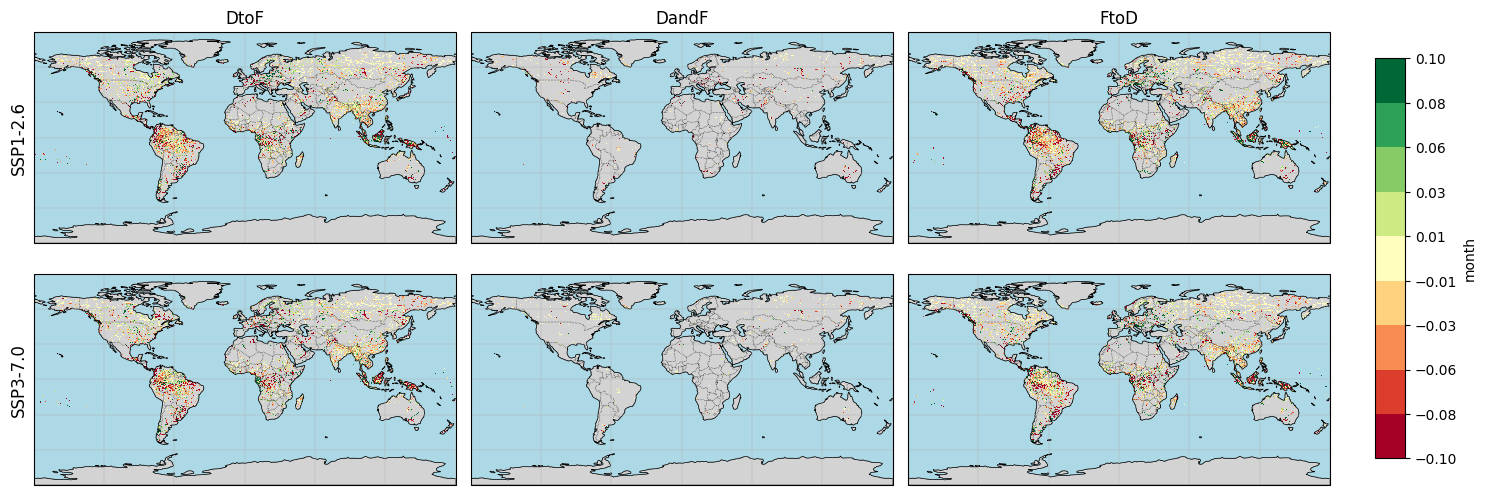

In [30]:
# Define scenarios
scenarios = {
    "SSP1-2.6": ssp126, 
    "SSP3-7.0": ssp370
}

# Define event types
event_types = ["DtoF", "DandF", "FtoD"]

# Define a continuous colormap
cmap = plt.cm.RdYlGn  # Yellow to Red/Orange colormap

# Define boundaries for the colorbar
bounds = np.linspace(-0.1,0.1,10).round(2)
norm = mcolors.BoundaryNorm(bounds, cmap.N)  # Normalize colors to data range

# Create figure and subplots (rows: scenarios, cols: event types)
fig, axes = plt.subplots(nrows=len(scenarios), ncols=len(event_types),
                         figsize=(15, 10), subplot_kw={"projection": ccrs.PlateCarree()})

# Create a colorbar axis
cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])  # Adjust the position of the colorbar

# Loop through scenarios and event types
for i, (scenario_name, scenario) in enumerate(scenarios.items()):
    for j, event in enumerate(event_types):
        ax = axes[i, j]
        
        # Extract the dataset
        if event == "DtoF":
            data = scenario['strength_seas_flood_DtoF'] - historical['strength_seas_flood_DtoF']
        elif event == "DandF":
            data =  scenario['strength_seas_flood_D&F'] - historical['strength_seas_flood_D&F']
        elif event == "FtoD":
            data = scenario['strength_seas_flood_FtoD'] - historical['strength_seas_flood_FtoD']
        
        # Add map features with outlines
        ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
        ax.add_feature(cfeature.BORDERS, linestyle=":", linewidth=0.4) 
        ax.add_feature(cfeature.LAND, facecolor = "lightgray", edgecolor="black", linewidth=0.3) 
        ax.add_feature(cfeature.OCEAN, facecolor="lightblue") 
        # Plot data
        img = data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm, add_colorbar=False, add_labels = False)

        # Remove auto-generated title
        ax.set_title("")  

        # Title for columns
        if i == 0:
            ax.set_title(event, fontsize=12)

        # Label rows
        if j == 0:
            ax.set_ylabel(scenario_name, fontsize=12)

        # Remove gridlines and ticks
        ax.set_xticks([])  # Remove x-axis ticks
        ax.set_yticks([])  # Remove y-axis ticks
        #ax.set_xlabel("")
        #ax.set_ylabel("")
        ax.gridlines(linewidth = 0.3, draw_labels=False)  # Remove gridline labels

plt.subplots_adjust(hspace=-0.9)
# Add a single colorbar
fig.colorbar(img, cax=cbar_ax, label="month")

plt.tight_layout(pad=1.5)
plt.tight_layout(rect=[0, 0, 0.9, 1]) 
plt.savefig(
    "change_strength_seasonality_floods.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    pad_inches=0.05  # Minimal external padding
)
plt.show()


In [4]:

### define regions for regional analysis
#North America
historical_NA = historical.sel(lat=slice(75, 15), lon=slice(-170, -50))
ssp126_NA = ssp126.sel(lat=slice(75, 15), lon=slice(-170, -50))
ssp370_NA = ssp370.sel(lat=slice(75, 15), lon=slice(-170, -50))

#South America
historical_SA = historical.sel(lat=slice(15, -60), lon=slice(-85, -30))
ssp126_SA = ssp126.sel(lat=slice(15, -60), lon=slice(-85, -30))
ssp370_SA = ssp370.sel(lat=slice(15, -60), lon=slice(-85, -30))

#Europe
historical_europe = historical.sel(lat=slice(72, 35), lon=slice(-25, 45))
ssp126_europe = ssp126.sel(lat=slice(72, 35), lon=slice(-25, 45))
ssp370_europe = ssp370.sel(lat=slice(72, 35), lon=slice(-25, 45))

#Subsahran Africa
historical_SSA = historical.sel(lat=slice(15, -35), lon=slice(-20, 55))
ssp126_SSA = ssp126.sel(lat=slice(15, -35), lon=slice(-20, 55))
ssp370_SSA = ssp370.sel(lat=slice(15, -35), lon=slice(-20, 55))

#NA/ME
historical_NA_ME = historical.sel(lat=slice(37, 15), lon=slice(-20, 60))
ssp126_NA_ME = ssp126.sel(lat=slice(37, 15), lon=slice(-20, 60))
ssp370_NA_ME = ssp370.sel(lat=slice(37, 15), lon=slice(-20, 60))

#central and northern Asia
historical_CNA = historical.sel(lat=slice(75, 35), lon=slice(40, 140))
ssp126_CNA = ssp126.sel(lat=slice(75, 35), lon=slice(40, 140))
ssp370_CNA = ssp370.sel(lat=slice(75, 35), lon=slice(40, 140))

#South East Asia
historical_SEA = historical.sel(lat=slice(35, -10), lon=slice(65, 135))
ssp126_SEA = ssp126.sel(lat=slice(35, -10), lon=slice(65, 135))
ssp370_SEA = ssp370.sel(lat=slice(35, -10), lon=slice(65, 135))

#Oceania
historical_Oce = historical.sel(lat=slice(0, -50), lon=slice(110, 180))
ssp126_Oce = ssp126.sel(lat=slice(0, -50), lon=slice(110, 180))
ssp370_Oce = ssp370.sel(lat=slice(0, -50), lon=slice(110, 180))                      

In [ ]:
#compute regional means for dates of droughts
scenario_names = ["historical", "ssp126", "ssp370"]
regions = {
    "NA":        [historical_NA,  ssp126_NA,  ssp370_NA],
    "SA":        [historical_SA,  ssp126_SA,  ssp370_SA],
    "Europe":    [historical_europe, ssp126_europe, ssp370_europe],
    "SSA":       [historical_SSA, ssp126_SSA, ssp370_SSA],
    "NA_ME":     [historical_NA_ME, ssp126_NA_ME, ssp370_NA_ME],
    "CNA":       [historical_CNA,  ssp126_CNA,  ssp370_CNA],
    "SEA":       [historical_SEA,  ssp126_SEA,  ssp370_SEA],
    "Oce":       [historical_Oce,  ssp126_Oce,  ssp370_Oce]
}
for region_name, ds_list in regions.items():
    for sc_name, ds in zip(scenario_names, ds_list):
        dtofall_median = ds['date_drought_DtoF'].mode().item()
        dtofmod_median = ds['date_drought_DtoF_moderate'].median().item()
        dtofrap_median = ds['date_drought_DtoF_rapid'].median().item()
        dtofabr_median = ds['date_drought_DtoF_abrupt'].median().item()

        ftodall_median = ds['date_drought_FtoD'].median().item()
        ftodmod_median = ds['date_drought_FtoD_moderate'].median().item()
        ftodrap_median = ds['date_drought_FtoD_rapid'].median().item()
        ftodabr_median = ds['date_drought_FtoD_abrupt'].median().item()
        
        dandf_median = ds['date_drought_D&F'].median().item()
        print(f"{region_name:8s} | {sc_name:10s} | DtoF all: {dtofall_median:3.2f} | DtoF slow: {dtofmod_median:3.2f} | DtoF rap : {dtofrap_median:3.2f}  | DtoF abr: {dtofabr_median:3.2f} | FtoD all: {ftodall_median:3.2f} | FtoD mod: {ftodmod_median:3.2f} | FtoD rap: {ftodrap_median:3.2f}| FtoD abr: {ftodabr_mean:3.2f} | D&F: {dandf_mean:3.2f}")


In [5]:
#compute regional means for flood dates
scenario_names = ["historical", "ssp126", "ssp370"]
regions = {
    "NA":        [historical_NA,  ssp126_NA,  ssp370_NA],
    "SA":        [historical_SA,  ssp126_SA,  ssp370_SA],
    "Europe":    [historical_europe, ssp126_europe, ssp370_europe],
    "SSA":       [historical_SSA, ssp126_SSA, ssp370_SSA],
    "NA_ME":     [historical_NA_ME, ssp126_NA_ME, ssp370_NA_ME],
    "CNA":       [historical_CNA,  ssp126_CNA,  ssp370_CNA],
    "SEA":       [historical_SEA,  ssp126_SEA,  ssp370_SEA],
    "Oce":       [historical_Oce,  ssp126_Oce,  ssp370_Oce]
}
for region_name, ds_list in regions.items():
    for sc_name, ds in zip(scenario_names, ds_list):
        dtofall_median = ds['date_flood_DtoF'].median().item()
        dtofmod_median = ds['date_flood_DtoF_moderate'].median().item()
        dtofrap_median = ds['date_flood_DtoF_rapid'].median().item()
        dtofabr_median = ds['date_flood_DtoF_abrupt'].median().item()

        ftodall_median = ds['date_flood_FtoD'].median().item()
        ftodmod_median = ds['date_flood_FtoD_moderate'].median().item()
        ftodrap_median = ds['date_flood_FtoD_rapid'].median().item()
        ftodabr_median = ds['date_flood_FtoD_abrupt'].median().item()
        
        dandf_median = ds['date_flood_D&F'].median().item()
        print(f"{region_name:8s} | {sc_name:10s} | DtoF all: {dtofall_median:3.2f} | DtoF slow: {dtofmod_median:3.2f} | DtoF rap : {dtofrap_median:3.2f}  | DtoF abr: {dtofabr_median:3.2f} | FtoD all: {ftodall_median:3.2f} | FtoD mod: {ftodmod_median:3.2f} | FtoD rap: {ftodrap_median:3.2f}| FtoD abr: {ftodabr_median:3.2f} | D&F: {dandf_median:3.2f}")


NA       | historical | DtoF all: 4.65 | DtoF slow: 4.67 | DtoF rap : 4.59  | DtoF abr: 4.35 | FtoD all: 4.62 | FtoD mod: 4.59 | FtoD rap: 4.77| FtoD abr: 4.54 | D&F: 4.94
NA       | ssp126     | DtoF all: 4.36 | DtoF slow: 4.19 | DtoF rap : 4.43  | DtoF abr: 4.78 | FtoD all: 4.37 | FtoD mod: 4.20 | FtoD rap: 4.44| FtoD abr: 4.42 | D&F: 4.64
NA       | ssp370     | DtoF all: 4.18 | DtoF slow: 3.96 | DtoF rap : 4.33  | DtoF abr: 4.65 | FtoD all: 4.21 | FtoD mod: 4.11 | FtoD rap: 4.23| FtoD abr: 4.22 | D&F: 4.42
SA       | historical | DtoF all: 3.55 | DtoF slow: 3.42 | DtoF rap : 4.89  | DtoF abr: 3.70 | FtoD all: 3.13 | FtoD mod: 3.26 | FtoD rap: 4.88| FtoD abr: 2.47 | D&F: 2.66
SA       | ssp126     | DtoF all: 3.17 | DtoF slow: 2.90 | DtoF rap : 4.06  | DtoF abr: 3.50 | FtoD all: 3.17 | FtoD mod: 3.00 | FtoD rap: 4.05| FtoD abr: 5.40 | D&F: 2.99
SA       | ssp370     | DtoF all: 3.24 | DtoF slow: 2.91 | DtoF rap : 4.06  | DtoF abr: 4.06 | FtoD all: 3.12 | FtoD mod: 3.14 | FtoD rap: 3

In [7]:
#compute regional averages for strength of seasonality of droughts and floods
scenario_names = ["historical", "ssp126", "ssp370"]
regions = {
    "NA":        [historical_NA,  ssp126_NA,  ssp370_NA],
    "SA":        [historical_SA,  ssp126_SA,  ssp370_SA],
    "Europe":    [historical_europe, ssp126_europe, ssp370_europe],
    "SSA":       [historical_SSA, ssp126_SSA, ssp370_SSA],
    "NA_ME":     [historical_NA_ME, ssp126_NA_ME, ssp370_NA_ME],
    "CNA":       [historical_CNA,  ssp126_CNA,  ssp370_CNA],
    "SEA":       [historical_SEA,  ssp126_SEA,  ssp370_SEA],
    "Oce":       [historical_Oce,  ssp126_Oce,  ssp370_Oce]
}
for region_name, ds_list in regions.items():
    for sc_name, ds in zip(scenario_names, ds_list):
        dtofall_median_drought = ds['strength_seas_drought_DtoF'].median().item()
        ftodall_median_drought = ds['strength_seas_drought_FtoD'].median().item()
        dtofall_median_flood = ds['strength_seas_flood_DtoF'].median().item()
        ftodall_median_flood = ds['strength_seas_flood_FtoD'].median().item()      
        
        dandf_median_drought = ds['strength_seas_drought_D&F'].median().item()
        dandf_median_flood = ds['strength_seas_flood_D&F'].median().item() 
        print(f"{region_name:8s} | {sc_name:10s} | DtoF all drought: {dtofall_median_drought:3.2f} | DtoF all flood: {dtofall_median_flood:3.2f} |  FtoD all drought: {ftodall_median_drought:3.2f} |  FtoD all flood: {ftodall_median_flood:3.2f} | D&F drought: {dandf_median_drought:3.2f} | D&F flood: {dandf_median_flood:3.2f}")


NA       | historical | DtoF all drought: 0.73 | DtoF all flood: 0.96 |  FtoD all drought: 0.80 |  FtoD all flood: 0.97 | D&F drought: 1.00 | D&F flood: 1.00
NA       | ssp126     | DtoF all drought: 0.74 | DtoF all flood: 0.95 |  FtoD all drought: 0.77 |  FtoD all flood: 0.96 | D&F drought: 0.99 | D&F flood: 0.98
NA       | ssp370     | DtoF all drought: 0.76 | DtoF all flood: 0.95 |  FtoD all drought: 0.75 |  FtoD all flood: 0.96 | D&F drought: 1.00 | D&F flood: 1.00
SA       | historical | DtoF all drought: 0.84 | DtoF all flood: 0.94 |  FtoD all drought: 0.82 |  FtoD all flood: 0.94 | D&F drought: 1.00 | D&F flood: 1.00
SA       | ssp126     | DtoF all drought: 0.67 | DtoF all flood: 0.91 |  FtoD all drought: 0.72 |  FtoD all flood: 0.91 | D&F drought: 0.99 | D&F flood: 0.98
SA       | ssp370     | DtoF all drought: 0.61 | DtoF all flood: 0.92 |  FtoD all drought: 0.65 |  FtoD all flood: 0.92 | D&F drought: 1.00 | D&F flood: 1.00
Europe   | historical | DtoF all drought: 0.69 | Dto